## 파이썬 머신러닝
# 간단한 예측과 비용함수(cost function)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 10명의 수학점수 분포

In [2]:
data = np.random.randint(0,11,size=10)
print('점수 :', data)
print('분포 :', np.bincount(data))

점수 : [10  1  0  1  5  6  5  1  0  8]
분포 : [2 3 0 0 0 2 1 0 1 0 1]


In [3]:
data.mean()

3.7

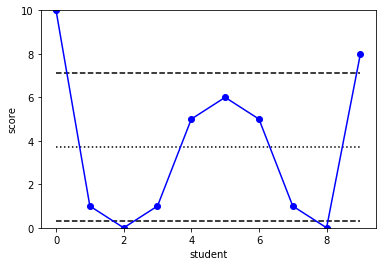

In [6]:
plt.plot(data, 'bo-')
plt.ylim(0,10)
plt.ylabel('score')
plt.xlabel('student')
plt.hlines([data.mean()], 0,9, linestyles=':')
plt.hlines([data.mean()-data.std(), data.mean()+data.std()], 0,9, linestyles='--')

Text(0,0.5,'count')

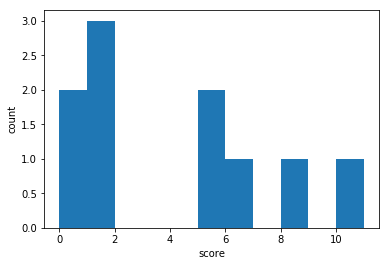

In [8]:
plt.hist(data,bins=range(12))
plt.xlabel('score')
plt.ylabel('count')

### 평균 예측 모델
- 가장 간단한 예측 모델을 만들어 보자.
- 즉, 평균값으로 예측한다.

In [9]:
model = data.mean()
model

3.7

Text(0,0.5,'score')

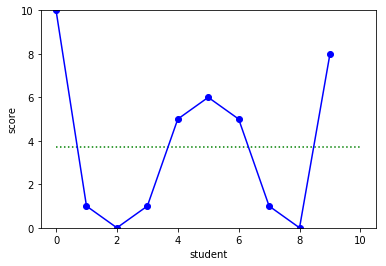

In [10]:
plt.plot(data, 'bo-')
plt.ylim(0,10)
plt.hlines([model], 0, 10, linestyles='dotted', colors='green')
plt.xlabel('student')
plt.ylabel('score')

In [11]:
data

array([10,  1,  0,  1,  5,  6,  5,  1,  0,  8])

In [12]:
data.mean()

3.7

- 오차를 구해보자
    - MAE : Mean Absolute Error
    - MSE : Mean Squared Error

In [15]:
MAE = np.abs(data - data.mean()).mean()
MAE

3.1

In [14]:
MSE = ((data - data.mean())**2).mean()
RMSE = np.sqrt(MSE)
MSE, RMSE

(11.61, 3.407345007480164)

In [21]:
MSE = ((data - 3.71)**2).mean()
RMSE = np.sqrt(MSE)
MSE, RMSE

(11.6101, 3.407359681630338)

In [22]:
MSE = ((data - 3.69)**2).mean()
RMSE = np.sqrt(MSE)
MSE, RMSE

(11.610100000000003, 3.407359681630339)

Text(0.5,0,'prediction')

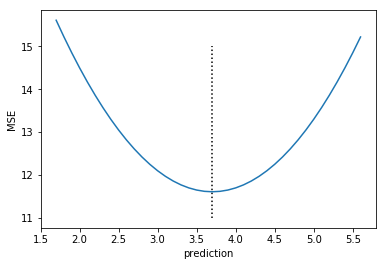

In [26]:
rng = np.arange(3.7-2,3.7+2,0.1)
plt.plot(rng, ((data - rng.reshape(-1,1))**2).mean(axis=1))
plt.vlines([data.mean()], 11, 15, linestyles=':')
plt.ylabel('MSE')
plt.xlabel('prediction')


### 비용함수 (cost function)
- 비용함수는 예측한 값과 실제 값과의 차이를 수치화하는 방법(함수)이다.
- 위의 결과에서 예측값인 평균값과 실제 데이터의 값들과의 차이로 계산하는 방법을 생각해 보자.

In [20]:
# 차이의 절대값 평균 (MAE)
cost_abs = np.abs(data - model).sum() / len(data)
cost_abs

1.7200000000000002

In [21]:
# 차이의 제곱 평균 (MSE)
cost_mse = np.power(data-model, 2).sum() / len(data)
cost_mse

4.09

In [22]:
# 차이의 제곱 평균의 제곱근 (RMSE)
cost_rmse = np.sqrt(cost_mse)
cost_rmse

2.0223748416156684

- 예측모델과 비용함수를 정의하면 최적의 예측방법을 알아낼 수 있다.
- 즉, 비용함수를 최소화하는 예측값을 찾아내면 된다.

- 먼저 상수값 b 로 예측하는 모델을 만들자.
- 그리고 비용함수로 cost_mse 를 사용하자.
$$ cost = \sum_{i=0}^{N-1} (x_i - b)^2 / N $$
$$ = b^2 -(\frac {2}{N} \sum x_i)b + \frac {1}{N}(\sum x_i^2)) $$
$$ \hat{b} = \frac{1}{N} \sum x_i $$
- 결과적으로, 최적의 예측값은 평균값임을 알 수 있다.

### 머신러닝의 일반적인 기호법
- 예측을 위해 사용되는 입력 데이터를 **X** 로 표기한다.
- 예측의 결과 값을 **y** 로 표기한다.
- 예측모델의 예측값을 $ \hat{y} $ (코드에서는 pred_y) 로 표기한다.
- 평균은 $ \bar{y} $

In [11]:
X = np.array(range(11)).reshape(-1,1) # 반드시 2차원 행렬 형태
y = data
pred_y = y.mean()

display(X, y, pred_y)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

array([ 8,  4,  5, 10,  7, 10,  2,  6,  8,  8])

6.8